<a href="https://colab.research.google.com/github/Harrystone/Deep-Learning-Assignment/blob/main/Diabetes_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from google.colab import drive
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
drive.mount('/content/gdrive')
data_path="/content/gdrive/MyDrive/Deep Learning Class/Diabetes/diabetes.csv"
data = pd.read_csv(data_path)
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
train1 = data.drop(['Outcome'],axis=1)
labels = data['Outcome']
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20,random_state =2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

#Create model
#Accuracy 73%
# model = Sequential()
# model.add(Dense(64, input_dim=8, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

#71%
# model = Sequential()
# model.add(Dense(64, input_dim=8, activation='relu', kernel_regularizer='l2'))
# model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
# model.add(Dense(16, activation='relu', kernel_regularizer='l2'))
# model.add(Dense(8, activation='relu', kernel_regularizer='l2'))
# model.add(Dense(1, activation='sigmoid'))

#0.75
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu', kernel_regularizer='l1'))
model.add(Dense(32, activation='relu', kernel_regularizer='l1'))
model.add(Dense(16, activation='relu', kernel_regularizer='l1'))
model.add(Dense(8, activation='relu', kernel_regularizer='l1'))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

with tf.device('/gpu:0'):
  history=model.fit(x=x_train,y=y_train.values,
            validation_data=(x_test,y_test.values),
            batch_size=128,epochs=1000,callbacks=[early_stop])

Epoch 1/1000
5/5 [==============================] - 14s 139ms/step - loss: 12.2988 - accuracy: 0.6516 - val_loss: 7.6065 - val_accuracy: 0.7078
Epoch 2/1000
5/5 [==============================] - 0s 7ms/step - loss: 7.9410 - accuracy: 0.6409 - val_loss: 5.3781 - val_accuracy: 0.6883
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 5.6601 - accuracy: 0.5365 - val_loss: 5.2711 - val_accuracy: 0.3766
Epoch 4/1000
5/5 [==============================] - 0s 7ms/step - loss: 5.2262 - accuracy: 0.3936 - val_loss: 4.9685 - val_accuracy: 0.4416
Epoch 5/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.9797 - accuracy: 0.4986 - val_loss: 4.7741 - val_accuracy: 0.6753
Epoch 6/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.8550 - accuracy: 0.6063 - val_loss: 4.6958 - val_accuracy: 0.6558
Epoch 7/1000
5/5 [==============================] - 0s 6ms/step - loss: 4.7624 - accuracy: 0.6046 - val_loss: 4.5702 - val_accuracy: 0.6753
Epoch 8/1000
5/5

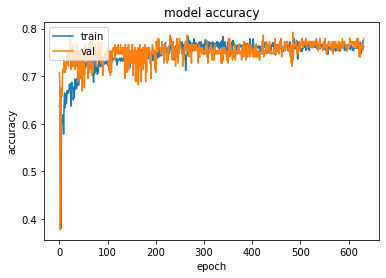

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)

2/2 [==============================] - 0s 4ms/step - loss: 0.7197 - accuracy: 0.7792
